# 🧼 Limpieza del set de datos 🧼

Primero, vamos a extraer las columnas que nos interesan para nuestro análisis.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

raw_df = pd.read_csv("files/hr_raw_data.csv", index_col=0)

pd.set_option("display.max_columns", None)

In [2]:
raw_df.head(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1


In [3]:
raw_df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

Columna jobrole: 

Sales Executive               381

Research Scientist            325

Laboratory Technician         289

Manufacturing Director        168

Healthcare Representative     155

Manager                       115

Sales Representative           96

Research Director              90

Human Resources                59

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='yearswithcurrmanager', ylabel='yearssincelastpromotion'>

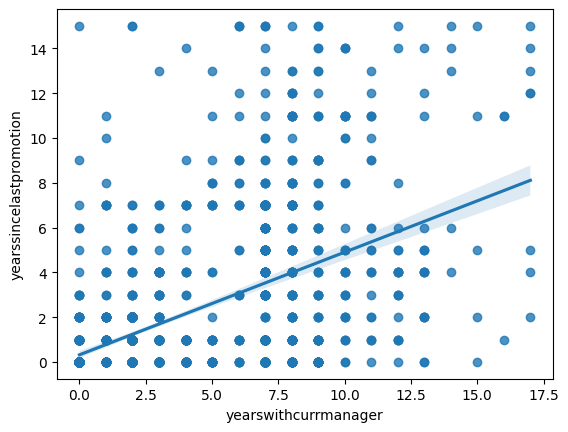

In [5]:
sns.regplot(x= 'yearswithcurrmanager',
                y = 'yearssincelastpromotion', 
                data = raw_df)

In [6]:
df = pd.DataFrame()

columns_to_import = ["employeenumber","datebirth", "remotework", "education", "gender", "stockoptionlevel", 
                     "percentsalaryhike", "salary", "monthlyincome", "joblevel", "jobrole", "relationshipsatisfaction", 
                     "environmentsatisfaction", "jobsatisfaction", "yearssincelastpromotion", "yearswithcurrmanager"]

for col in columns_to_import:
    df[col] = raw_df[col] 

In [7]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager
0,1,1972,Yes,3,0,0,13,"195370,00$","16280,83$",5,resEArch DIREcToR,3,1,3,15,15
1,2,1971,1,4,0,1,14,"199990,00$",NaN,5,ManAGeR,1,3,3,11,9
2,3,1981,1,2,0,0,11,"192320,00$",NaN,5,ManaGER,4,3,4,11,15
3,4,1976,False,4,1,2,19,"171690,00$","14307,50$",4,ReseArCH DIrECtOr,2,1,3,5,6
4,5,1977,0,3,1,1,12,NaN,"12783,92$",4,sAleS EXECUtIve,4,1,1,2,8


## Limpiando las columnas elegidas

Primero, quitar duplicados

In [8]:
df.duplicated().sum()

np.int64(64)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

Gender: cambiar 1 y 0 por Female y Male.

In [11]:
df['gender'] = df['gender'].map({0: 'F', 1: 'M'})

In [12]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

Remote work: unificar valores

In [13]:
df['remotework'] = df['remotework'].astype(str).str.lower()
df['remotework'] = df['remotework'].replace({
                   'true': 'yes', 'false': 'no', 
                   '1': 'yes', '0': 'no'})

In [14]:
df['remotework'].unique()

array(['yes', 'no'], dtype=object)

Salary y Monthly income: Quitar símbolos y pasarlo a float.

In [15]:
def clean_money(*args):
    resultados = []
    for dato in args:
        try:
            resultados.append(float(dato.replace('$', '').replace(',', '.')))
        except: 
            resultados.append(np.nan)
    return resultados if len(resultados) > 1 else resultados[0]

In [16]:
df[["monthlyincome","salary"]] = df.apply(lambda x: clean_money(x["monthlyincome"], x["salary"]), axis=1, result_type="expand")

In [17]:
df[["monthlyincome","salary"]]

,monthlyincome,salary
0,16280.83,195370.00
1,NaN,199990.00
2,NaN,192320.00
3,14307.50,171690.00
4,12783.92,NaN
...,...,...
1609,8604.17,103250.00
1610,3705.83,44470.00
1611,NaN,100071.84
1612,4492.84,53914.11


Jobrole: ponerlo todo lower case.

In [18]:
df['jobrole'] = df['jobrole'].str.strip().str.replace(" ", "_").str.lower()

In [19]:
df['jobrole']

0            research_director
1                      manager
2                      manager
3            research_director
4              sales_executive
                 ...          
1609           sales_executive
1610     laboratory_technician
1611           sales_executive
1612           sales_executive
1613    manufacturing_director
Name: jobrole, Length: 1614, dtype: object

## Nulos en Salary

Como tenemos monthltincome podemos obtener salary multiplicándolo por 12.

In [20]:
df["salary"].describe()

count      1340.000000
mean      65245.875313
std       45933.029687
min       10090.000000
25%       28111.130000
50%       53914.110000
75%       94607.500000
max      199990.000000
Name: salary, dtype: float64

In [21]:
df[["monthlyincome", "salary"]].isna().sum()

monthlyincome    468
salary           274
dtype: int64

In [22]:
df["salary_from_month"] = df["monthlyincome"]*12 

In [23]:
df[["salary", "salary_from_month"]]

,salary,salary_from_month
0,195370.00,195369.96
1,199990.00,NaN
2,192320.00,NaN
3,171690.00,171690.00
4,NaN,153407.04
...,...,...
1609,103250.00,103250.04
1610,44470.00,44469.96
1611,100071.84,NaN
1612,53914.11,53914.08


In [24]:
df['salary'] = df['salary'].fillna(df['salary_from_month'])

In [25]:
df['salary'].isna().sum()

np.int64(0)

["employeenumber","datebirth", "remotework", "education", "gender", "stockoptionlevel", 
                     "percentsalaryhike", "salary", "monthlyincome", "joblevel", "jobrole", "relationshipsatisfaction", 
                     "environmentsatisfaction", "jobsatisfaction", "yearssincelastpromotion", "yearswithcurrmanager"]


objetivo final :en la pregunta de los empleado estan satisfechos??? 

nos centramos en si la empresa es igualitaria

PREGUNTAS FINALES: 
 vamos a separarlo entre género y edad:
  
  GÉNERO 

 -hay repartición equitativa entre el género en la empresa? --> "gender"

 -gana más quién tiene más educación? más hombre o mujer? --> "gender", "education"
 
 -están más satifechos los hombres o las mujeres? en base a salario, ambiente o rango? --> "salary", "gender", "environmentsatisfaction", "joblevel", "jobrole"

 EDAD

 -cómo es la distribución de edades los empleados? --> "datebirth"

 -gana más quién tiene más educación? según edad --> "datebirth", "education"

 -están más satifechos segun edades? en base a salario, ambiente o rango? --> "salary", "datebirth", "environmentsatisfaction", "joblevel", "jobrole"


Fase 3: Visualizando los datos.

In [26]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month
0,1,1972,yes,3,F,0,13,195370.00,16280.83,5,research_director,3,1,3,15,15,195369.96
1,2,1971,yes,4,F,1,14,199990.00,NaN,5,manager,1,3,3,11,9,NaN
2,3,1981,yes,2,F,0,11,192320.00,NaN,5,manager,4,3,4,11,15,NaN
3,4,1976,no,4,M,2,19,171690.00,14307.50,4,research_director,2,1,3,5,6,171690.00
4,5,1977,no,3,M,1,12,153407.04,12783.92,4,sales_executive,4,1,1,2,8,153407.04


In [27]:
#actualizar edades. CREACIÓN COLUMNA 

df["age_2025"] = 2025 - df["datebirth"] 
df["age_2025"] 

0       53
1       54
2       44
3       49
4       48
        ..
1609    38
1610    47
1611    41
1612    38
1613    48
Name: age_2025, Length: 1614, dtype: int64

In [28]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month,age_2025
0,1,1972,yes,3,F,0,13,195370.00,16280.83,5,research_director,3,1,3,15,15,195369.96,53
1,2,1971,yes,4,F,1,14,199990.00,NaN,5,manager,1,3,3,11,9,NaN,54
2,3,1981,yes,2,F,0,11,192320.00,NaN,5,manager,4,3,4,11,15,NaN,44
3,4,1976,no,4,M,2,19,171690.00,14307.50,4,research_director,2,1,3,5,6,171690.00,49
4,5,1977,no,3,M,1,12,153407.04,12783.92,4,sales_executive,4,1,1,2,8,153407.04,48


<Axes: xlabel='age_2025', ylabel='Count'>

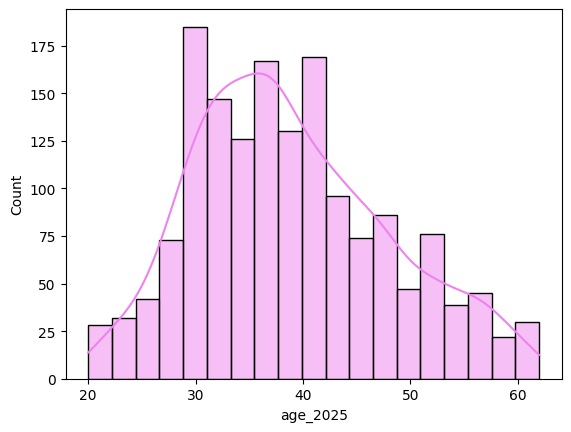

In [29]:
# -cómo es la distribución de edades los empleados? --> "datebirth"

sns.histplot(x = "age_2025", 
             data = df, 
             color = "violet", 
             kde = True)

Vamos a hacer división generacional:

Generación Baby Boomers (nacidos entre 1945 y 1964)

Generación X (nacidos entre 1965 y 1981)

Generación Y o Millennials (nacidos entre 1982 y 1994)

Generación Z o Centennials (nacidos entre 1995 y 2009)

In [30]:
#-gana más quién tiene más educación? según edad --> "datebirth", "education"
df["age_2025"].describe().T.reset_index()


,index,age_2025
0,count,1614.000000
1,mean,38.923792
2,std,9.101332
3,min,20.000000
4,25%,32.000000
5,50%,38.000000
6,75%,45.000000
7,max,62.000000


In [31]:
def asignacion_generacion(datebirth):
    if datebirth >= 1995:
        return 'Gen Z'
    elif datebirth >=1981:
        return 'Millennial'
    elif datebirth >=1965:
        return 'Gen X'
    else:
        return 'Baby Boomer'
    
df["generation"] = df['datebirth'].apply(asignacion_generacion)
display(df)


,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month,age_2025,generation
0,1,1972,yes,3,F,0,13,195370.00,16280.83,5,research_director,3,1,3,15,15,195369.96,53,Gen X
1,2,1971,yes,4,F,1,14,199990.00,NaN,5,manager,1,3,3,11,9,NaN,54,Gen X
2,3,1981,yes,2,F,0,11,192320.00,NaN,5,manager,4,3,4,11,15,NaN,44,Millennial
3,4,1976,no,4,M,2,19,171690.00,14307.50,4,research_director,2,1,3,5,6,171690.00,49,Gen X
4,5,1977,no,3,M,1,12,153407.04,12783.92,4,sales_executive,4,1,1,2,8,153407.04,48,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1610,1987,no,1,F,1,11,103250.00,8604.17,3,sales_executive,1,3,4,3,7,103250.04,38,Millennial
1610,1611,1978,yes,2,F,0,12,44470.00,3705.83,2,laboratory_technician,2,3,2,0,8,44469.96,47,Gen X
1611,1612,1984,yes,5,F,0,18,100071.84,NaN,3,sales_executive,4,13,3,0,7,NaN,41,Millennial
1612,1613,1987,yes,4,F,2,13,53914.11,4492.84,2,sales_executive,4,1,4,0,7,53914.08,38,Millennial


COMPROBACIÓN FUNCIÓN

In [32]:
asignacion_generacion(1993)

'Millennial'

In [33]:
asignacion_generacion(1985)

'Millennial'

In [34]:
asignacion_generacion(1955)

'Baby Boomer'

In [35]:
asignacion_generacion(2009)


'Gen Z'

In [36]:
df_generation = df.groupby('generation')['age_2025'].describe()

df_generation

,count,mean,std,min,25%,50%,75%,max
generation,,,,,,,,
Baby Boomer,15.0,61.333333,0.487950,61.0,61.0,61.0,62.0,62.0
Gen X,404.0,50.905941,4.425963,45.0,47.0,50.0,55.0,60.0
Gen Z,282.0,26.925532,2.807867,20.0,25.0,28.0,29.0,30.0
Millennial,913.0,36.959474,3.896059,31.0,34.0,37.0,40.0,44.0


<Axes: xlabel='generation', ylabel='count'>

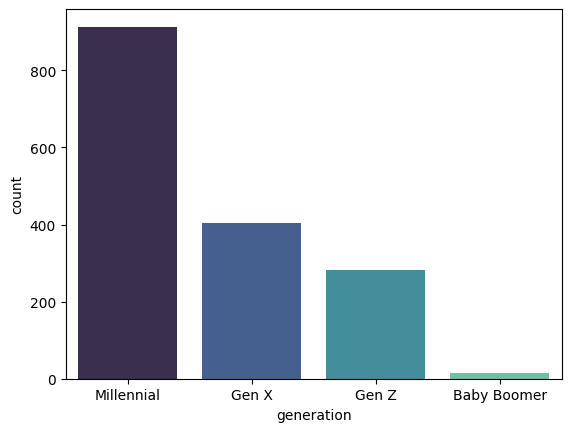

In [37]:
#vamos a hacer un countplot

sns.countplot(x='generation', data=df, palette='mako', order = ["Millennial", "Gen X", "Gen Z", "Baby Boomer"] )

Vemos que no es inclusiva. La mayoria son millenials. Pocos baby boomer porque muchos seguro se jubilan. pero no es algo particular de la empresa sino que es algo general del mercado laboral, le grueso de la poblacionm activa se concentra enm millenials

In [38]:
conteo = df['generation'].value_counts()

In [39]:
df_pie = df.groupby("generation")["employeenumber"].count().reset_index()

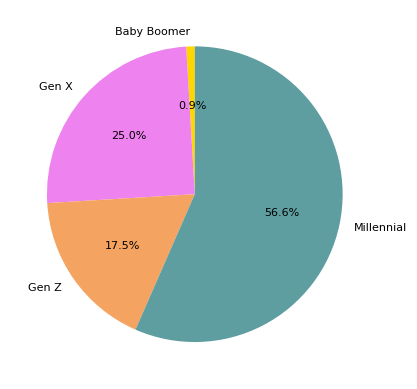

In [40]:
colores = ["gold", "violet", "sandybrown", "cadetblue"]

# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("employeenumber", labels= "generation",
        data = df_pie, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

## Están más satifechos segun edades? en base a salario, ambiente o rango? --> "salary", "datebirth", "environmentsatisfaction", "joblevel", "jobrole"

Hay un valor de salary que es dos órdenes de magnitud mayor que los demás (10E6). Lo filtramos y llamamos a la variable clean_salary.

In [41]:
df["salary"].describe()

count    1.614000e+03
mean     6.558843e+04
std      5.273783e+04
min      1.009000e+04
25%      2.811113e+04
50%      5.391411e+04
75%      9.420500e+04
max      1.118004e+06
Name: salary, dtype: float64

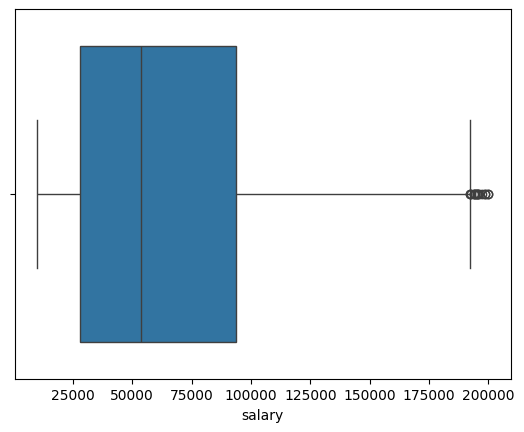

In [42]:
clean_salary = df["salary"][df["salary"] != 1.118004E+06]

sns.boxplot(x=clean_salary, data=df);

In [43]:
df_california = pd.read_csv("labor_force_participation_rate_by_age_group.csv")

pd.set_option("display.max_columns", None)

df_california

,Area Type,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,State,California,2/1/2008,2008,February,0.358,0.724,0.816,0.816,0.811,0.651,0.146
1,State,California,3/1/2008,2008,March,0.354,0.722,0.816,0.817,0.811,0.653,0.147
2,State,California,4/1/2008,2008,April,0.349,0.722,0.815,0.818,0.812,0.655,0.149
3,State,California,5/1/2008,2008,May,0.347,0.722,0.816,0.820,0.811,0.655,0.150
4,State,California,6/1/2008,2008,June,0.344,0.721,0.816,0.822,0.810,0.654,0.153
...,...,...,...,...,...,...,...,...,...,...,...,...
200,State,California,10/1/2024,2024,October,0.287,0.682,0.816,0.836,0.801,0.649,0.186
201,State,California,11/1/2024,2024,November,0.282,0.685,0.816,0.837,0.802,0.647,0.186
202,State,California,12/1/2024,2024,December,0.278,0.689,0.817,0.838,0.803,0.646,0.186
203,State,California,1/1/2025,2025,January,0.274,0.689,0.818,0.838,0.803,0.646,0.187


Mirar el DataFrame original para verificar el año del archivo

In [44]:
df_2023_calif=df_california[df_california["Year"]==2023]

In [45]:
df_2023_calif.select_dtypes( exclude="O").describe().T

,count,mean,std,min,25%,50%,75%,max
Year,12.0,2023.000000,0.000000,2023.000,2023.00000,2023.000,2023.00000,2023.000
Age 16-19,12.0,0.278000,0.007422,0.267,0.27150,0.278,0.28525,0.288
Age 20-24,12.0,0.660417,0.005567,0.655,0.65600,0.658,0.66575,0.669
Age 25-34,12.0,0.816583,0.003919,0.811,0.81300,0.817,0.82025,0.822
Age 35-44,12.0,0.818667,0.002270,0.814,0.81775,0.819,0.82025,0.822
Age 45-54,12.0,0.801917,0.002193,0.800,0.80075,0.801,0.80250,0.806
Age 55-64,12.0,0.653000,0.001044,0.652,0.65200,0.653,0.65300,0.655
Age 65+,12.0,0.191000,0.002374,0.186,0.19075,0.191,0.19200,0.195


#gana mas quién tiene mas educacion según edad

In [46]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,joblevel,jobrole,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month,age_2025,generation
0,1,1972,yes,3,F,0,13,195370.00,16280.83,5,research_director,3,1,3,15,15,195369.96,53,Gen X
1,2,1971,yes,4,F,1,14,199990.00,NaN,5,manager,1,3,3,11,9,NaN,54,Gen X
2,3,1981,yes,2,F,0,11,192320.00,NaN,5,manager,4,3,4,11,15,NaN,44,Millennial
3,4,1976,no,4,M,2,19,171690.00,14307.50,4,research_director,2,1,3,5,6,171690.00,49,Gen X
4,5,1977,no,3,M,1,12,153407.04,12783.92,4,sales_executive,4,1,1,2,8,153407.04,48,Gen X


In [47]:
df[["salary","education","generation"]]

,salary,education,generation
0,195370.00,3,Gen X
1,199990.00,4,Gen X
2,192320.00,2,Millennial
3,171690.00,4,Gen X
4,153407.04,3,Gen X
...,...,...,...
1609,103250.00,1,Millennial
1610,44470.00,2,Gen X
1611,100071.84,5,Millennial
1612,53914.11,4,Millennial


HS
Associate’s
Bachelor’s
Master’s
Doctorate’s

In [48]:
df["education"]=pd.cut(df["education"], bins=5, labels=["HS", "Associate’s","Bachelor’s","Master’s","Doctorate’s"])

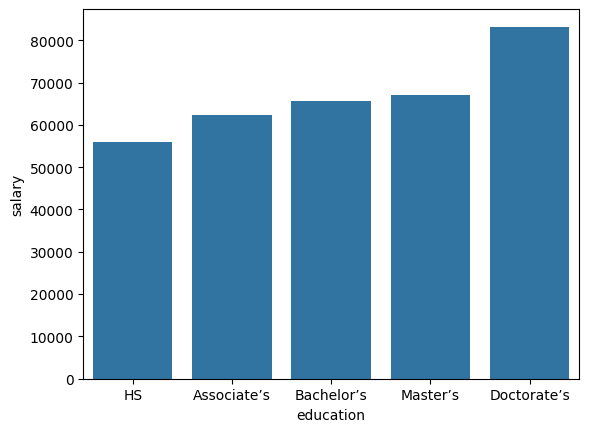

In [49]:
sns.barplot(x="education",y= clean_salary,data=df,errorbar=None);

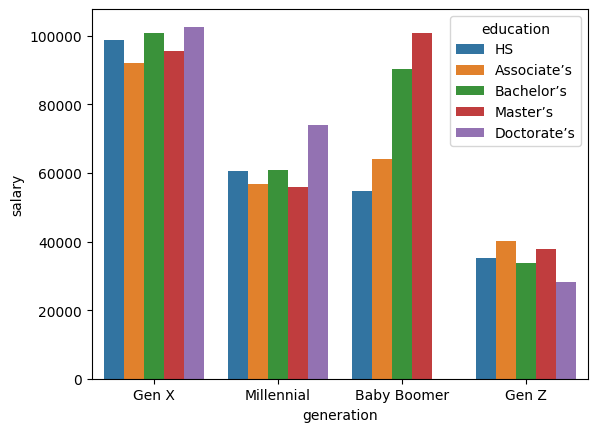

In [50]:
sns.barplot(x="generation",y= clean_salary, hue="education",data=df,errorbar=None);

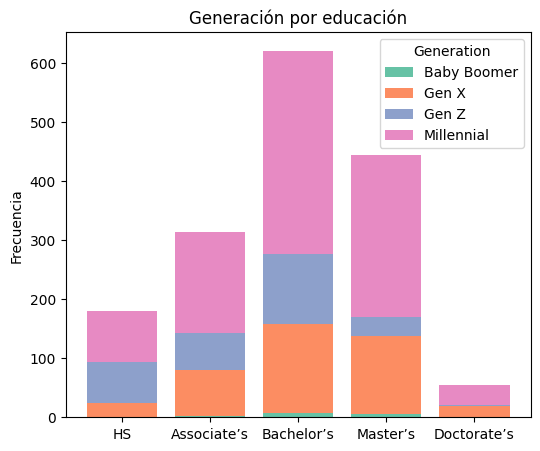

In [51]:
# Contar las ocurrencias de las combinaciones de 'categoria' y 'subcategoria'
count_data = pd.crosstab(df['education'], df['generation'])

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 5))

# Apilar las barras usando plt.bar con bottom acumulado
bottom = np.zeros(len(count_data))  # Base inicial para cada categoría
colores = sns.color_palette("Set2", len(count_data.columns))  # Colores para cada subcategoría

# Para cada subcategoría, apilamos las barras
for i, col in enumerate(count_data.columns):
    ax.bar(count_data.index, count_data[col], bottom=bottom, color=colores[i], label=col)
    bottom += count_data[col]  # Acumulamos para la siguiente parte de la barra

# Agregar etiquetas y leyenda
ax.set_ylabel("Frecuencia")
ax.set_title("Generación por educación")
ax.legend(title="Generation")

plt.show()

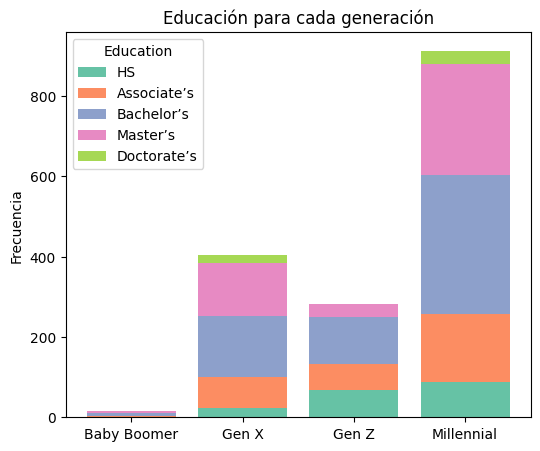

In [52]:
# Contar las ocurrencias de las combinaciones de 'categoria' y 'subcategoria'
count_data = pd.crosstab(df['generation'], df['education'])

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 5))

# Apilar las barras usando plt.bar con bottom acumulado
bottom = np.zeros(len(count_data))  # Base inicial para cada categoría
colores = sns.color_palette("Set2", len(count_data.columns))  # Colores para cada subcategoría

# Para cada subcategoría, apilamos las barras
for i, col in enumerate(count_data.columns):
    ax.bar(count_data.index, count_data[col], bottom=bottom, color=colores[i], label=col)
    bottom += count_data[col]  # Acumulamos para la siguiente parte de la barra

# Agregar etiquetas y leyenda
ax.set_ylabel("Frecuencia")
ax.set_title("Educación para cada generación")
ax.legend(title="Education")

plt.show()

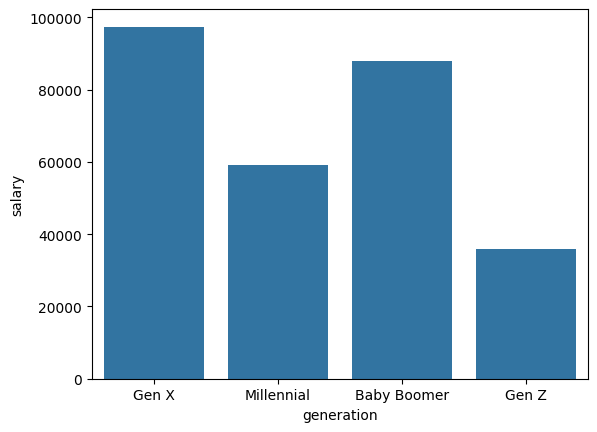

In [53]:
sns.barplot(x="generation",y= clean_salary,data=df,errorbar=None);

Las personas con doctorado reciben más salario, menos en GenZ. 

Entre generaciones, cobran más los de la GenX, seguidos de los Millennial. Los que menos cobran son la GenZ (considerar la falta de experiencia). 

En proporción, se invierte más (en proporción) en capital humano en Millenials. Teniendo en cuenta que los Millenials representan una mayoría en la problación activa, quizás la empresa podría enfocarse en "contentar" a este grupo.

<Axes: xlabel='count', ylabel='jobrole'>

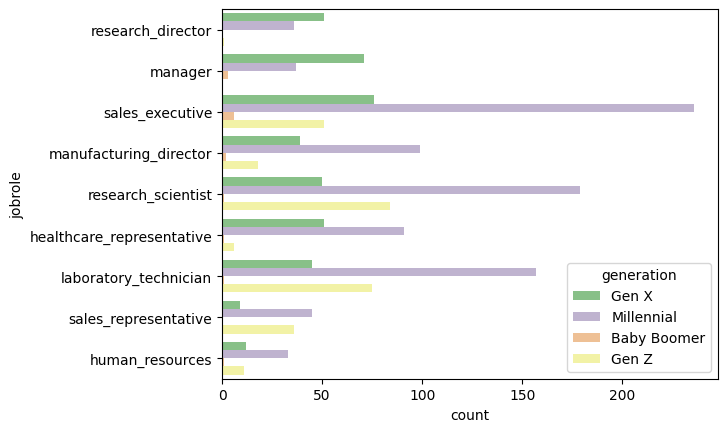

In [ ]:
# Gráfico principal
sns.countplot(
    y="jobrole",
    data=df,
    palette="Accent",
    hue="generation",
    )

baby boomers solo son managers y sales exec y manufacturing directors, mientras que Millenials se esparcen en todos los job roles. Gen Z, al ser generacion mas joven, no tiene la expeiencia suficiente para ser research director, pero estan presente en el resto de los roles. la reparticion de Gen X se ve mas equitativa en todos lo roles y tiene mas presencia en research director. 

oportunidades de promocion y capacitacion para Millenials y Gen Z

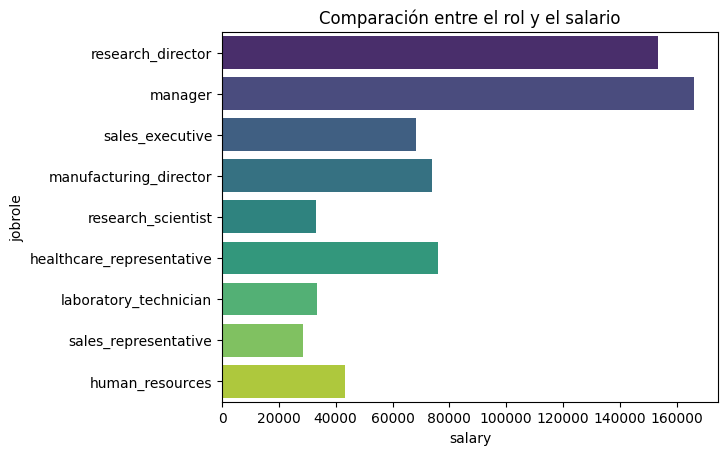

In [ ]:
sns.barplot(x= clean_salary, y='jobrole', data=df, palette='viridis',errorbar=None)
plt.title("Comparación entre el rol y el salario")
plt.show();


research director y manager son las cargos que mas ganan. (pendiente con comparar con edades y genero) 

In [68]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

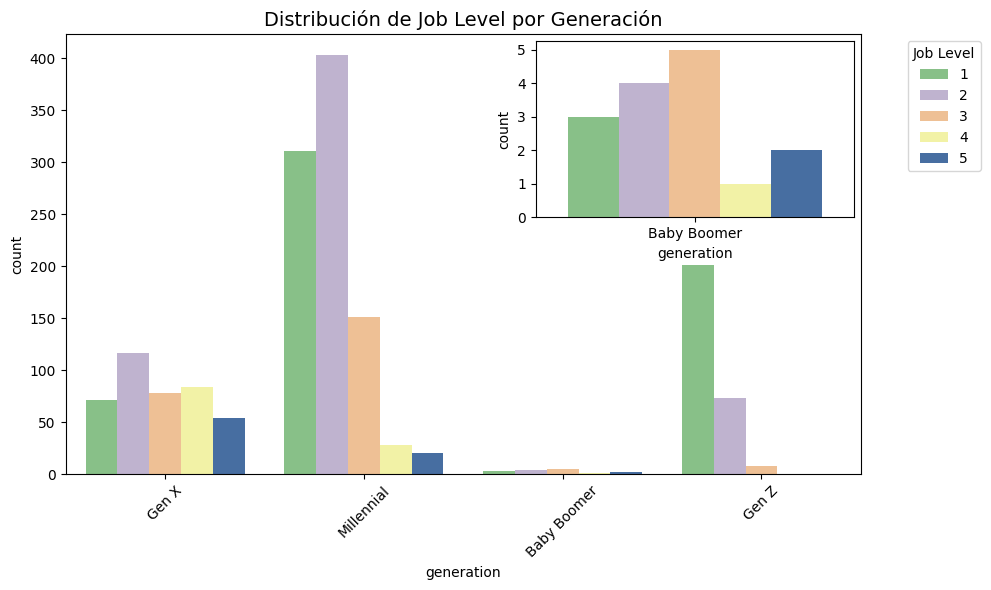

In [76]:
# Figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico principal
sns.countplot(
    x="generation",
    data=df,
    palette="Accent",
    hue="joblevel",
    ax=ax
)
ax.set_title("Distribución de Job Level por Generación", fontsize=14)
ax.tick_params(axis='x', rotation=45)

# Gráfico insertado (zoom)
axins = inset_axes(ax, width="40%", height="40%", loc='upper right')

# Escogemos generaciones poco representadas (puedes adaptar esto según tus datos)
low_gen = df['generation'].value_counts().nsmallest(1).index
df_low_gen = df[df['generation'].isin(low_gen)]

sns.countplot(
    x="generation",
    data=df_low_gen,
    hue="joblevel",
    palette="Accent",
    ax=axins
)
axins.tick_params(axis='x')
axins.legend_.remove()  # opcional: eliminar la leyenda duplicada

# Mover la leyenda fuera del gráfico principal si quieres
ax.legend(title="Job Level", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Gen X tiene el nivel de puesto promedio más alto, seguido de cerca por los Baby Boomers.
Millennials tienen un nivel de puesto más bajo que Gen X y Baby Boomers, pero superior a Gen Z, que presenta el nivel más bajo.
Si el objetivo de la empresa es fomentar la retención y el crecimiento profesional de los empleados jóvenes, podría ser útil analizar oportunidades de promoción y capacitación para Millennials y Gen Z

Gen X y Baby Boomers tienen los niveles de puesto más altos en promedio.

Esto sugiere que las generaciones más antiguas ocupan roles más altos, lo que es esperable dado que han tenido más tiempo para avanzar en su carrera.
La presencia de valores atípicos sugiere que algunos empleados jóvenes han alcanzado niveles altos, pero son pocos casos.
La jerarquía de puestos sigue una estructura esperada basada en la experiencia.

La movilidad hacia niveles altos parece ser más común en generaciones mayores.

Podría ser interesante investigar si los Millennials y Gen Z enfrentan barreras para la promoción.

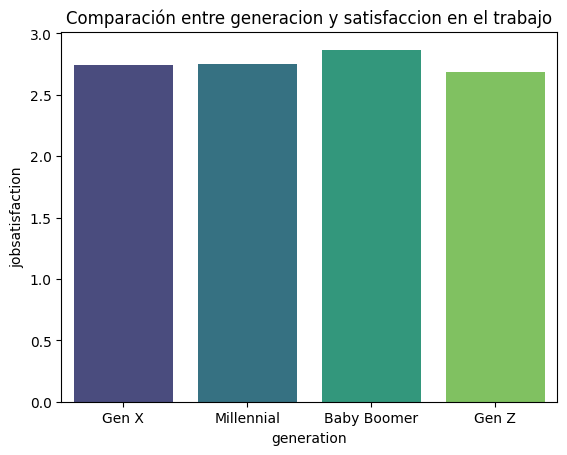

In [90]:
sns.barplot(x='generation', y='jobsatisfaction', data=df, palette='viridis',errorbar=None)
plt.title("Comparación entre generacion y satisfaccion en el trabajo")
plt.show();


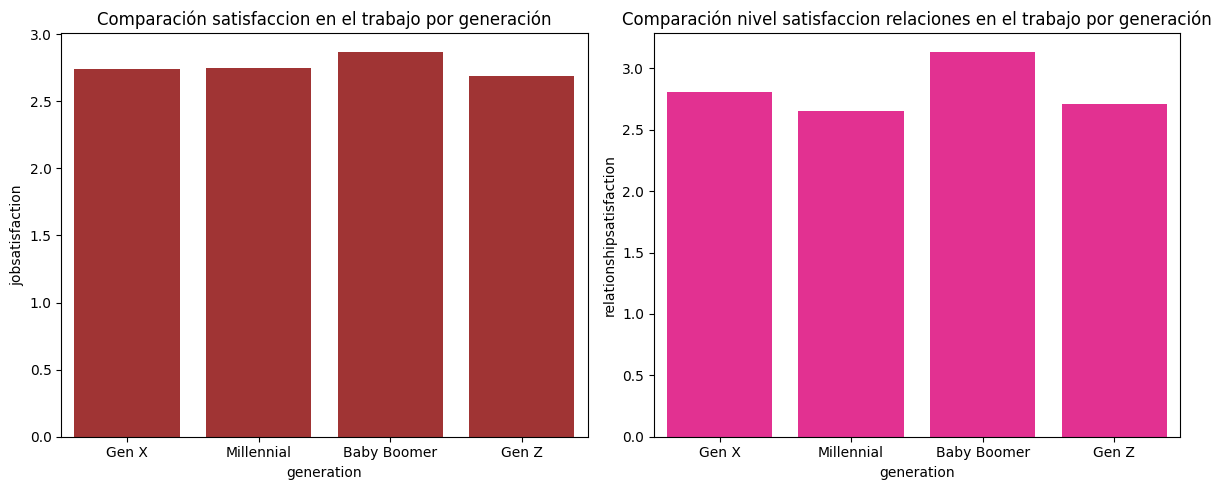

In [ ]:
# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer gráfico: Barplot comparando 'generation' y 'joblevel'
sns.barplot(x=df['generation'], y=df["jobsatisfaction"], ax=axes[0], color='firebrick',errorbar=None)
axes[0].set_title("Comparación satisfaccion en el trabajo por generación")

# Segundo gráfico: Boxplot comparando 'generation' y 'joblevel'
sns.barplot(x=df['generation'], y=df['relationshipsatisfaction'] ax=axes[1], color='deeppink',errorbar=None)
axes[1].set_title("Comparación nivel satisfaccion relaciones en el trabajo por generación")

# Mostrar los gráficos
plt.tight_layout()
plt.show()


No se observa una gran disparidad entre generaciones, lo que indica que la satisfacción laboral es relativamente estable entre todos los grupos.


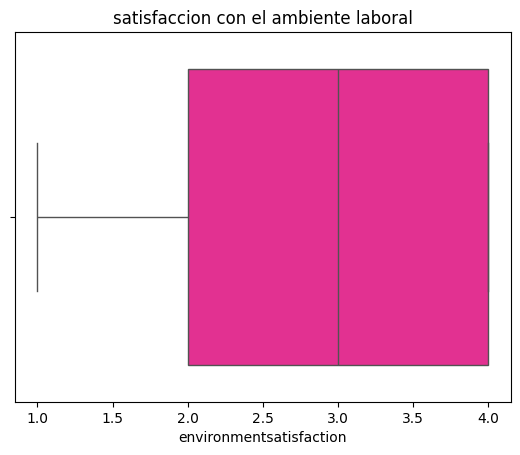

In [99]:
sns.boxplot(x=df['environmentsatisfaction'][df['environmentsatisfaction']<= 4],data= df, color='deeppink')
plt.title("satisfaccion con el ambiente laboral");

👆 se filtra la escala de satisfaccion en el ambiente porque por encima de 4 era un aprox de 7% de los empleados

In [100]:
clean_en_sat = df['environmentsatisfaction'][df['environmentsatisfaction']<= 4]

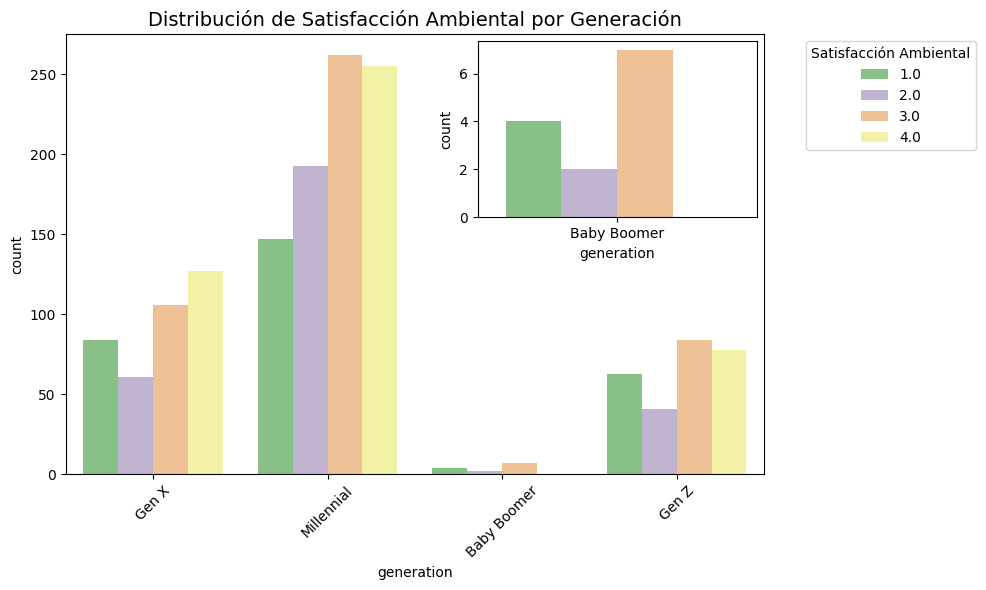

In [104]:
# Figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico principal
sns.countplot(
    x="generation",
    data=df,
    palette="Accent",
    hue= clean_en_sat,
    ax=ax
)
ax.set_title("Distribución de Satisfacción Ambiental por Generación", fontsize=14)
ax.tick_params(axis='x', rotation=45)

# Gráfico insertado (zoom)
axins = inset_axes(ax, width="40%", height="40%", loc='upper right')

# Escogemos generaciones poco representadas (puedes adaptar esto según tus datos)
low_gen = df['generation'].value_counts().nsmallest(1).index
df_low_gen = df[df['generation'].isin(low_gen)]

sns.countplot(
    x="generation",
    data=df_low_gen,
    hue= clean_en_sat,
    palette="Accent",
    ax=axins
)
axins.tick_params(axis='x')
axins.legend_.remove()  # opcional: eliminar la leyenda duplicada

# Mover la leyenda fuera del gráfico principal si quieres
ax.legend(title="Satisfacción Ambiental", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

👆 los baby boomers no estan contentos pero los millenials si. Gen X está polarizado entre menos satisfechos y más satisfechos 

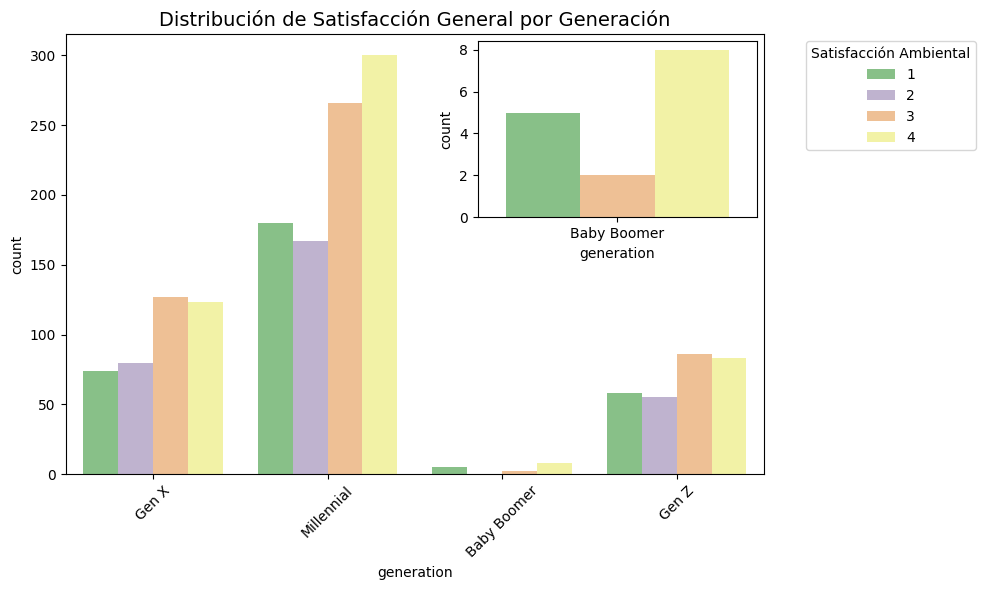

In [110]:
# Figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico principal
sns.countplot(
    x="generation",
    data=df,
    palette="Accent",
    hue= "jobsatisfaction",
    ax=ax
)
ax.set_title("Distribución de Satisfacción General por Generación", fontsize=14)
ax.tick_params(axis='x', rotation=45)

# Gráfico insertado (zoom)
axins = inset_axes(ax, width="40%", height="40%", loc='upper right')

# Escogemos generaciones poco representadas (puedes adaptar esto según tus datos)
low_gen = df['generation'].value_counts().nsmallest(1).index
df_low_gen = df[df['generation'].isin(low_gen)]

sns.countplot(
    x="generation",
    data=df_low_gen,
    hue= "jobsatisfaction",
    palette = [(0.498, 0.788, 0.498),(0.992, 0.753, 0.525),(1.000, 1.000, 0.600)],
    ax=axins
)
axins.tick_params(axis='x')
axins.legend_.remove()  # opcional: eliminar la leyenda duplicada

# Mover la leyenda fuera del gráfico principal si quieres
ax.legend(title="Satisfacción Ambiental", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



👆 la satisfaccion general es buena 

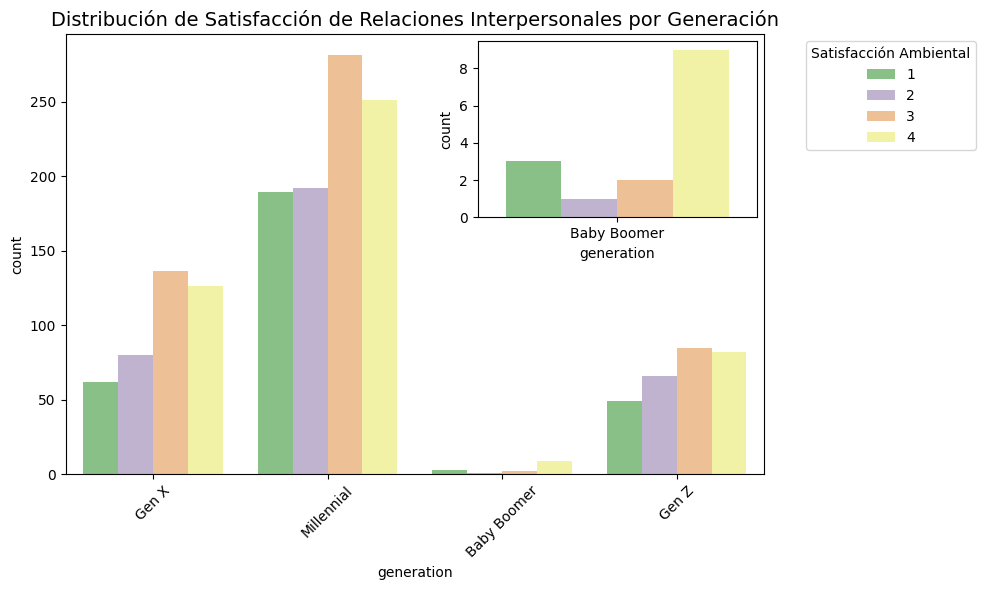

In [111]:
# Figura principal
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico principal
sns.countplot(
    x="generation",
    data=df,
    palette="Accent",
    hue= "relationshipsatisfaction",
    ax=ax
)
ax.set_title("Distribución de Satisfacción de Relaciones Interpersonales por Generación", fontsize=14)
ax.tick_params(axis='x', rotation=45)

# Gráfico insertado (zoom)
axins = inset_axes(ax, width="40%", height="40%", loc='upper right')

# Escogemos generaciones poco representadas (puedes adaptar esto según tus datos)
low_gen = df['generation'].value_counts().nsmallest(1).index
df_low_gen = df[df['generation'].isin(low_gen)]

sns.countplot(
    x="generation",
    data=df_low_gen,
    hue= "relationshipsatisfaction",
    palette = "Accent",
    ax=axins
)
axins.tick_params(axis='x')
axins.legend_.remove()  # opcional: eliminar la leyenda duplicada

# Mover la leyenda fuera del gráfico principal si quieres
ax.legend(title="Satisfacción Ambiental", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



👆 en general la satisfaccion de relaciones interpersonales se encuentra entre niveles 3 y 4; es decir, buena  

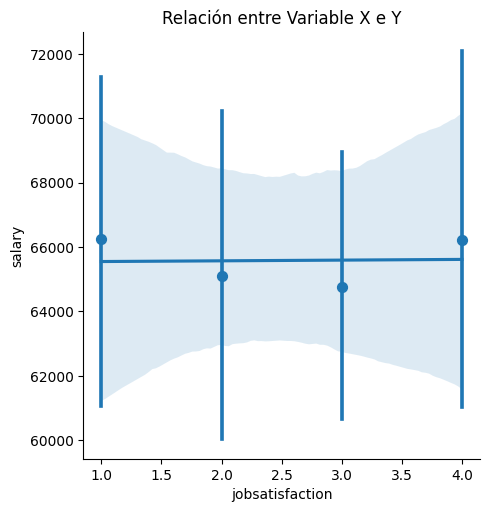

In [116]:
sns.lmplot(y= "salary", x='jobsatisfaction', data=df, x_estimator= np.mean)#convertir las columnas de satisfaccion a categóricas, gráficas poco claras
plt.title("Relación entre Variable X e Y")
plt.show()

👆 no hay realcion entre la satisfaccion general  y el nivel de salario. parece que los empleados valoran otras cosas como relaciones y el ambiente 

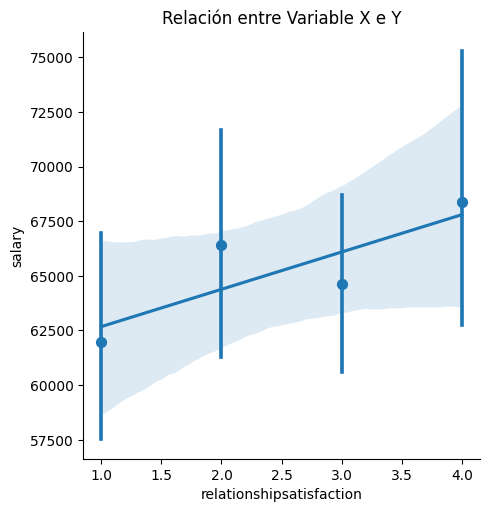

In [117]:
sns.lmplot(y= "salary", x='relationshipsatisfaction', data=df, x_estimator= np.mean)#convertir las columnas de satisfaccion a categóricas, gráficas poco claras
plt.title("Relación entre Variable X e Y")
plt.show()

In [120]:
df[['salary', 'relationshipsatisfaction']].corr(method='kendall')


,salary,relationshipsatisfaction
salary,1.00000,0.00341
relationshipsatisfaction,0.00341,1.00000


 👆 no hay relacion entre la satisfaccion entre relaciones interpersonales en el trabajo y el salario.

In [123]:
df_filtrado_env = df[df['environmentsatisfaction']<= 4]

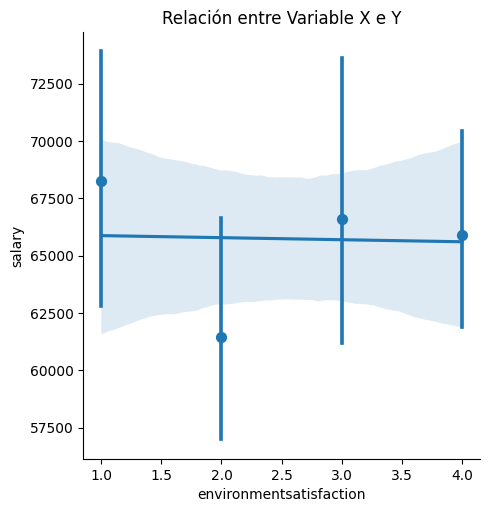

In [124]:
sns.lmplot(y= "salary", x= "environmentsatisfaction", data=df_filtrado_env, x_estimator= np.mean)#convertir las columnas de satisfaccion a categóricas, gráficas poco claras
plt.title("Relación entre Variable X e Y")
plt.show()

👆 no hay relacion entre la satisfaccion ambiental y el nivel salario 

<Axes: xlabel='count', ylabel='jobrole'>

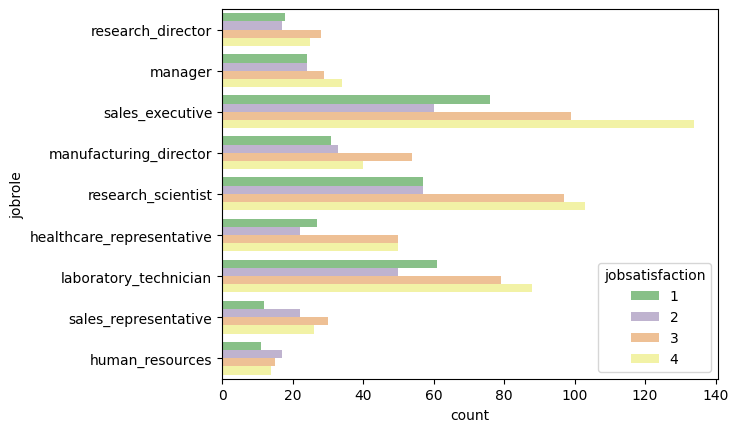

In [127]:
sns.countplot(
    y="jobrole",
    data=df,
    palette="Accent",
    hue= "jobsatisfaction"
)

👆sales execs y laboratory techs son los menos satisfechos. Human resources tambien presente insatisfacción 